In [1]:
## 0. Importing Pytorch and setting up device-agnostic code
import torch
from torch import nn
torch.__version__

'2.0.1+cu117'

In [4]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

1. Get Data
Our dataset is a subset of the Food101 dataset.
Food101 starts with 101 different classes of food and 1000 images per class (750 training, 250 testing).

Our dataset starts with 3 classes of food and only 10% of the images.

Why do this?

When starting out ML projects, it's important to try things on a small scale and then increase the scale when necessary.



In [8]:
import requests
import zipfile
from pathlib import Path

#Setup path to a data folder
data_path = Path('data/')
image_path = data_path / 'pizza_steak_sushi'

#if the image folder doesn't exist, download it and prepare it
if image_path.is_dir():
    print(f"{image_path} directory already exists...skipping download")
else:
    print(f"{image_path} does not exist, creating one...")
    image_path.mkdir(parents=True, exist_ok=True)
    
with open(data_path / 'pizza_steak_sushi.zip', 'wb') as f:
    request = requests.get('https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip')
    print('Downloading pizza, steak, sushi data...')
    f.write(request.content)

#unzip pizza, steak,sushi data
with zipfile.ZipFile(data_path / 'pizza_steak_sushi.zip', 'r') as zip_ref:
    print('Unzipping pizza, steak and sushi data...')
    zip_ref.extractall(image_path)

data\pizza_steak_sushi directory already exists...skipping download
Unzipping pizza, steak and sushi data...


In [9]:
##2. Becoming one with the data (data preparation and data exploration)
import os
def walk_through_dir(dir_path):
    """Walks through dir_path returning its contents."""
    for dirpath, dirnames, filenames in os.walk(dir_path):
        print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'")
        

In [10]:
walk_through_dir(image_path)

There are 2 directories and 0 images in 'data\pizza_steak_sushi'
There are 3 directories and 0 images in 'data\pizza_steak_sushi\test'
There are 0 directories and 25 images in 'data\pizza_steak_sushi\test\pizza'
There are 0 directories and 19 images in 'data\pizza_steak_sushi\test\steak'
There are 0 directories and 31 images in 'data\pizza_steak_sushi\test\sushi'
There are 3 directories and 0 images in 'data\pizza_steak_sushi\train'
There are 0 directories and 78 images in 'data\pizza_steak_sushi\train\pizza'
There are 0 directories and 75 images in 'data\pizza_steak_sushi\train\steak'
There are 0 directories and 72 images in 'data\pizza_steak_sushi\train\sushi'


In [11]:
#Setup train and testing paths
train_dir = image_path / 'train'
test_dir = image_path / 'test'

train_dir, test_dir

(WindowsPath('data/pizza_steak_sushi/train'),
 WindowsPath('data/pizza_steak_sushi/test'))

####2.1 Visualizing and image

Let's write some code to:
1. Get all of the image paths
2. Pick a random image path using Python's random.choice()
3. Get the image class name using `pathlib.Path.parent.stem`
4. Since we're working with images, let's popen the image with python.PIL
5. We will show the image and print metadata

In [56]:
import random
from PIL import Image

#set seed
# random.seed(42)
#1. Get all image paths
image_path_list = list(image_path.glob("*/*/*.jpg"))

#2. Pick a random image path
random_image_path = random.choice(image_path_list)

#3
image_class = random_image_path.parent.stem

#4. Open Image
img = Image.open(random_image_path)

#5. Print metadata
print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")



Random image path: data\pizza_steak_sushi\train\steak\2614189.jpg
Image class: steak
Image height: 512
Image width: 512


(-0.5, 511.5, 511.5, -0.5)

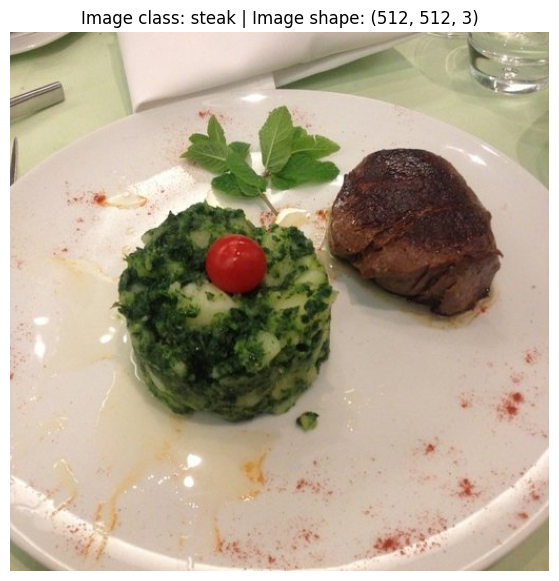

In [57]:
import matplotlib.pyplot as plt
import numpy as np

#Turn the image into an array
img_as_array = np.asarray(img)
plt.figure(figsize=(10, 7))
plt.imshow(img_as_array)
plt.title(f"Image class: {image_class} | Image shape: {img_as_array.shape}")
plt.axis(False)


In [58]:
img_as_array

array([[[110,  94,  81],
        [113,  97,  84],
        [123, 107,  94],
        ...,
        [170, 166, 128],
        [169, 166, 125],
        [155, 152, 111]],

       [[125, 109,  96],
        [132, 116, 103],
        [144, 128, 115],
        ...,
        [173, 169, 131],
        [173, 169, 131],
        [161, 158, 117]],

       [[157, 141, 128],
        [162, 146, 133],
        [167, 151, 138],
        ...,
        [172, 168, 130],
        [174, 170, 132],
        [164, 160, 122]],

       ...,

       [[172, 163, 122],
        [175, 166, 125],
        [175, 166, 125],
        ...,
        [157, 143, 104],
        [158, 144, 105],
        [161, 147, 108]],

       [[173, 164, 123],
        [176, 167, 126],
        [177, 168, 127],
        ...,
        [157, 143, 106],
        [157, 143, 104],
        [159, 145, 106]],

       [[173, 164, 123],
        [177, 168, 127],
        [178, 169, 128],
        ...,
        [157, 143, 106],
        [157, 143, 104],
        [158, 144, 105]]